In [1]:
import gdown
import zipfile

# Download the dataset
dataset_url = "https://drive.google.com/file/d/1z0mreUtRmR-P-magILsDR3T7M6IkGXtY/view?usp=sharing"
file_id = dataset_url.split("/")[-2]
prefix = 'https://drive.google.com/uc?export=download&id='
gdown.download(prefix + file_id, "data.zip", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1z0mreUtRmR-P-magILsDR3T7M6IkGXtY
From (redirected): https://drive.google.com/uc?export=download&id=1z0mreUtRmR-P-magILsDR3T7M6IkGXtY&confirm=t&uuid=7e3046b6-8d20-4efe-bb70-a29e17e54547
To: C:\Users\Viketan\Documents\Projects\Chest-Cancer-Classification\research\data.zip
100%|█████████████████████████████████████████████████████████████████████████████| 49.0M/49.0M [00:03<00:00, 15.7MB/s]


'data.zip'

In [2]:
# Extract the zip file
with zipfile.ZipFile("data.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [ ]:
!pip install tensorflow

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers

In [3]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 50

In [4]:
import matplotlib.pyplot as plt

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("data/Chest-CT-Scan-data",shuffle=True,image_size = (IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE)

Found 343 files belonging to 2 classes.


In [6]:
class_name = dataset.class_names

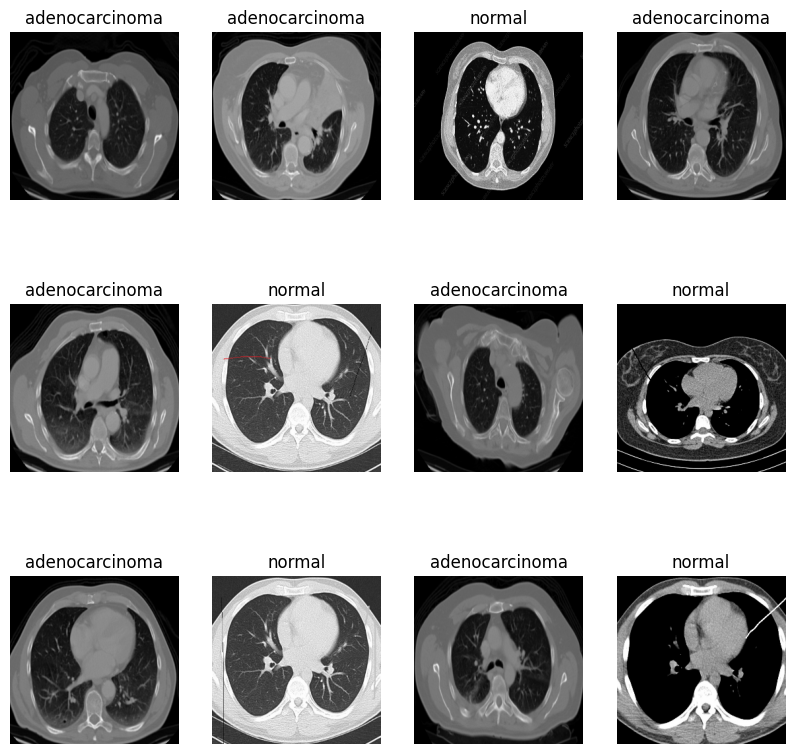

In [7]:
plt.figure(figsize=(10,10))
for img_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(img_batch[i].numpy().astype('int'))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

In [8]:
train_dataset = dataset.take(int(len(dataset) * 0.8))
temp = dataset.skip(int(len(dataset) * 0.8))
validate_dataset = temp.take(int(len(dataset) * 0.1))
test_dataset = temp.skip(int(len(dataset) * 0.1))

In [9]:
train_dataset = train_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validate_dataset = validate_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1.0/255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

In [12]:
input_shape = (IMG_SIZE, IMG_SIZE, CHANNEL)  # 1 channel for black-and-white images
n_classes = len(class_name)

model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, CHANNEL)),  # Grayscale images have 1 channel
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])


In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validate_dataset,
    epochs=50  # Adjust the number of epochs as needed
)

Epoch 1/50
8/8 [==============================] - 10s 285ms/step - loss: 0.6995 - accuracy: 0.4961 - val_loss: 0.7847 - val_accuracy: 0.4062
Epoch 2/50
8/8 [==============================] - 2s 272ms/step - loss: 0.5980 - accuracy: 0.6836 - val_loss: 0.4338 - val_accuracy: 0.8750
Epoch 3/50
8/8 [==============================] - 2s 282ms/step - loss: 0.6051 - accuracy: 0.7266 - val_loss: 0.5634 - val_accuracy: 0.7500
Epoch 4/50
8/8 [==============================] - 2s 282ms/step - loss: 0.5576 - accuracy: 0.7344 - val_loss: 0.5166 - val_accuracy: 0.7500
Epoch 5/50
8/8 [==============================] - 2s 269ms/step - loss: 0.4681 - accuracy: 0.8320 - val_loss: 0.2712 - val_accuracy: 0.9062
Epoch 6/50
8/8 [==============================] - 2s 267ms/step - loss: 0.3667 - accuracy: 0.8555 - val_loss: 0.4711 - val_accuracy: 0.8438
Epoch 7/50
8/8 [==============================] - 2s 266ms/step - loss: 0.3269 - accuracy: 0.8672 - val_loss: 0.1904 - val_accuracy: 0.9375
Epoch 8/50
8/8 [===

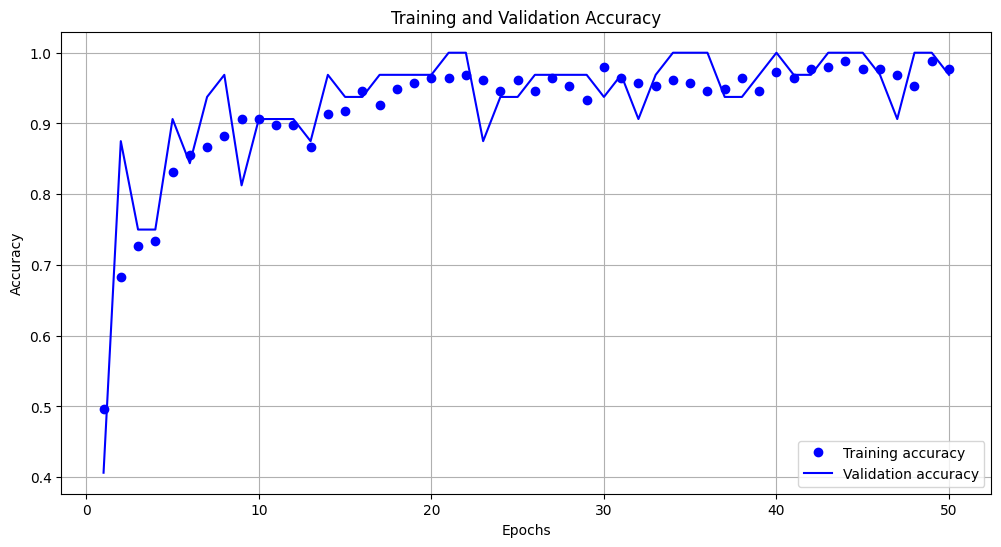

In [16]:
# Extract history data
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")

2/2 [==============================] - 1s 354ms/step - loss: 0.0812 - accuracy: 0.9636
Test accuracy: 0.9636


In [18]:
# Save the model
model.save('model.keras')

In [19]:
loaded_model = tf.keras.models.load_model('model.keras')

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the model
model = tf.keras.models.load_model('model.keras')  # Load your model

# Define the predict function
def predict(model, img_path, img_size):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    # Preprocess the image
    img_array = preprocess_input(img_array)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = tf.argmax(predictions[0]).numpy()
    confidence = tf.reduce_max(predictions[0]).numpy()

    return predicted_class, confidence, predictions

# Example usage
img_path = 'new.png'  # Replace with your image path
img_size = 256  # Replace with your image size

predicted_class, confidence, predictions = predict(model, img_path, img_size)
print("Predicted class:", class_name[predicted_class])
print(f'Confidence:{confidence*100}%')

1/1 [==============================] - 0s 468ms/step
Predicted class: normal
Confidence:99.98477697372437%


In [24]:
import optuna
import tensorflow as tf
from tensorflow.keras import layers, models
from tqdm import tqdm  # Import tqdm for progress tracking

# Define the base model structure using tunable hyperparameters
def create_model(trial):
    # Suggest hyperparameters to tune
    filters_1 = trial.suggest_categorical('filters_1', [32, 64, 128])
    filters_2 = trial.suggest_categorical('filters_2', [64, 128, 256])
    filters_3 = trial.suggest_categorical('filters_3', [64, 128, 256])
    kernel_size = trial.suggest_categorical('kernel_size', [3, 5])
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)

    # Base model with tunable parameters
    model = models.Sequential([
        layers.Input(shape=(IMG_SIZE, IMG_SIZE, CHANNEL)),  # For grayscale images (1 channel)
        resize_rescale,
        data_augmentation,
        layers.Conv2D(filters_1, (kernel_size, kernel_size), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters_2, (kernel_size, kernel_size), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters_3, (kernel_size, kernel_size), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters_3, (kernel_size, kernel_size), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
    ])

    # Optimizer: Adam with a tunable learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define the objective function for Optuna
def objective(trial):
    # Create the model using suggested hyperparameters
    model = create_model(trial)

    # Use tqdm to track the training process
    with tqdm(total=10, desc="Training Model", leave=True) as pbar:  # Assuming 10 epochs
        # Train the model
        history = model.fit(
            train_dataset,
            validation_data=validate_dataset,
            epochs=10,  # Reduce for tuning, increase for final training
            callbacks=[
                tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: pbar.update(1))  # Update tqdm after each epoch
            ],
            verbose=0
        )

    # Evaluate model on validation set and return validation accuracy
    val_loss, val_acc = model.evaluate(validate_dataset, verbose=0)
    return val_acc

# Create the Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best trial results
print(f"Best trial: {study.best_trial.value}")
print("Best hyperparameters: ", study.best_trial.params)

C:\ProgramData\miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-09-28 19:28:23,776] A new study created in memory with name: no-name-f2b0aaff-9f23-4455-9c2a-321e84873280


Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.76s/it]
[I 2024-09-28 19:29:22,305] Trial 0 finished with value: 0.78125 and parameters: {'filters_1': 64, 'filters_2': 256, 'filters_3': 64, 'kernel_size': 5, 'learning_rate': 0.0005919491681484987, 'dropout_rate': 0.29550540376842815}. Best is trial 0 with value: 0.78125.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model: 100%|██████████████████████████████████████████████████████████████████| 10/10 [01:27<00:00,  8.78s/it]
[I 2024-09-28 19:30:50,665] Trial 1 finished with value: 0.75 and parameters: {'filters_1': 128, 'filters_2': 256, 'filters_3': 64, 'kernel_size': 5, 'learning_rate': 0.00018489930209175402, 'dropout_rate': 0.47514124731939444}. Best is trial 0 with value: 0.78125.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model:  70%|██████████████████████████████████████████████▉                    | 7/10 [00:27<00:11,  3.92s/it]
[I 2024-09-28 19:31:18,392] Trial 2 finished with value: 0.75 and parameters: {'filters_1': 32, 'filters_2': 256, 'filters_3': 64, 'kernel_size': 3, 'learning_rate': 0.0004115961677407088, 'dropout_rate': 0.22911358013254823}. Best is trial 0 with value: 0.78125.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model:  80%|█████████████████████████████████████████████████████▌             | 8/10 [00:35<00:08,  4.39s/it]
[I 2024-09-28 19:31:53,822] Trial 3 finished with value: 0.5625 and parameters: {'filters_1': 64, 'filters_2': 64, 'filters_3': 256, 'kernel_size': 5, 'learning_rate': 0.0028969394503637405, 'dropout_rate': 0.473578636939935}. Best is trial 0 with value: 0.78125.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model: 100%|██████████████████████████████████████████████████████████████████| 10/10 [01:10<00:00,  7.01s/it]
[I 2024-09-28 19:33:04,477] Trial 4 finished with value: 0.71875 and parameters: {'filters_1': 128, 'filters_2': 256, 'filters_3': 64, 'kernel_size': 5, 'learning_rate': 1.4391215851324489e-05, 'dropout_rate': 0.34006167166193013}. Best is trial 0 with value: 0.78125.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.66s/it]
[I 2024-09-28 19:33:51,387] Trial 5 finished with value: 0.71875 and parameters: {'filters_1': 32, 'filters_2': 256, 'filters_3': 64, 'kernel_size': 5, 'learning_rate': 1.4735356288218079e-05, 'dropout_rate': 0.48008929441031006}. Best is trial 0 with value: 0.78125.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:27<00:00,  2.78s/it]
[I 2024-09-28 19:34:19,529] Trial 6 finished with value: 0.65625 and parameters: {'filters_1': 32, 'filters_2': 64, 'filters_3': 128, 'kernel_size': 3, 'learning_rate': 1.1810390680751104e-05, 'dropout_rate': 0.4493799854586292}. Best is trial 0 with value: 0.78125.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:34<00:00,  3.45s/it]
[I 2024-09-28 19:34:54,368] Trial 7 finished with value: 0.71875 and parameters: {'filters_1': 64, 'filters_2': 64, 'filters_3': 256, 'kernel_size': 3, 'learning_rate': 1.375382608285056e-05, 'dropout_rate': 0.4162193678420114}. Best is trial 0 with value: 0.78125.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.02s/it]
[I 2024-09-28 19:35:24,931] Trial 8 finished with value: 0.71875 and parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 64, 'kernel_size': 3, 'learning_rate': 6.661580339058614e-05, 'dropout_rate': 0.22182107398750744}. Best is trial 0 with value: 0.78125.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model:  50%|█████████████████████████████████▌                                 | 5/10 [00:25<00:25,  5.20s/it]
[I 2024-09-28 19:35:51,276] Trial 9 finished with value: 0.5 and parameters: {'filters_1': 128, 'filters_2': 64, 'filters_3': 64, 'kernel_size': 5, 'learning_rate': 0.006830131848894889, 'dropout_rate': 0.4406295034352973}. Best is trial 0 with value: 0.78125.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model:  80%|█████████████████████████████████████████████████████▌             | 8/10 [00:37<00:09,  4.66s/it]
[I 2024-09-28 19:36:28,859] Trial 10 finished with value: 0.96875 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 128, 'kernel_size': 5, 'learning_rate': 0.0007402175704868113, 'dropout_rate': 0.30254716914508345}. Best is trial 10 with value: 0.96875.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model:  50%|█████████████████████████████████▌                                 | 5/10 [00:19<00:19,  3.85s/it]
[I 2024-09-28 19:36:48,762] Trial 11 finished with value: 0.65625 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 128, 'kernel_size': 5, 'learning_rate': 0.0009594196704248492, 'dropout_rate': 0.30915922574629623}. Best is trial 10 with value: 0.96875.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:36<00:00,  3.63s/it]
[I 2024-09-28 19:37:25,439] Trial 12 finished with value: 0.9375 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 128, 'kernel_size': 5, 'learning_rate': 0.0009199244389961693, 'dropout_rate': 0.28077335156895344}. Best is trial 10 with value: 0.96875.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:36<00:00,  3.67s/it]
[I 2024-09-28 19:38:02,483] Trial 13 finished with value: 0.96875 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 128, 'kernel_size': 5, 'learning_rate': 0.0017096444918238236, 'dropout_rate': 0.273933625105631}. Best is trial 10 with value: 0.96875.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model:  90%|████████████████████████████████████████████████████████████▎      | 9/10 [00:32<00:03,  3.63s/it]
[I 2024-09-28 19:38:35,504] Trial 14 finished with value: 0.3125 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 128, 'kernel_size': 5, 'learning_rate': 0.0030423108459335024, 'dropout_rate': 0.38197243807387204}. Best is trial 10 with value: 0.96875.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model:  60%|████████████████████████████████████████▏                          | 6/10 [00:22<00:15,  3.83s/it]
[I 2024-09-28 19:38:58,805] Trial 15 finished with value: 0.71875 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 128, 'kernel_size': 5, 'learning_rate': 0.00015620707067598414, 'dropout_rate': 0.2714485043484165}. Best is trial 10 with value: 0.96875.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model:  40%|██████████████████████████▊                                        | 4/10 [00:15<00:23,  3.91s/it]
[I 2024-09-28 19:39:14,765] Trial 16 finished with value: 0.84375 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 128, 'kernel_size': 5, 'learning_rate': 0.002240405226190604, 'dropout_rate': 0.34049096919792327}. Best is trial 10 with value: 0.96875.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model:  60%|████████████████████████████████████████▏                          | 6/10 [00:22<00:15,  3.78s/it]
[I 2024-09-28 19:39:37,814] Trial 17 finished with value: 0.84375 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 128, 'kernel_size': 5, 'learning_rate': 0.009505730499509797, 'dropout_rate': 0.251181120510672}. Best is trial 10 with value: 0.96875.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:34<00:00,  3.47s/it]
[I 2024-09-28 19:40:12,868] Trial 18 finished with value: 0.96875 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 128, 'kernel_size': 3, 'learning_rate': 0.0014610273355992194, 'dropout_rate': 0.20370237509237119}. Best is trial 10 with value: 0.96875.
Training Model:   0%|                                                                           | 0/10 [00:00<?, ?it/s]

Training Model:   0%|                                                                           | 0/10 [00:25<?, ?it/s]
[W 2024-09-28 19:40:38,687] Trial 19 failed with parameters: {'filters_1': 128, 'filters_2': 128, 'filters_3': 256, 'kernel_size': 5, 'learning_rate': 0.0002142372757720201, 'dropout_rate': 0.38093788953948277} because of the following error: ResourceExhaustedError().
Traceback (most recent call last):
  File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Viketan\AppData\Local\Temp\ipykernel_2692\3660058260.py", line 53, in objective
    history = model.fit(
  File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\tensorflow\python\eager\execute.py", line 54, in quick_execute
    tensors = py

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential_22/max_pooling2d_80/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "C:\ProgramData\miniconda3\envs\tf\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\miniconda3\envs\tf\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\miniconda3\envs\tf\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\ProgramData\miniconda3\envs\tf\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\ProgramData\miniconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Viketan\AppData\Local\Temp\ipykernel_2692\3660058260.py", line 70, in <module>
      study.optimize(objective, n_trials=20)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\optuna\study\study.py", line 475, in optimize
      _optimize(
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\optuna\study\_optimize.py", line 63, in _optimize
      _optimize_sequential(
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\optuna\study\_optimize.py", line 160, in _optimize_sequential
      frozen_trial = _run_trial(study, func, catch)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
      value_or_values = func(trial)
    File "C:\Users\Viketan\AppData\Local\Temp\ipykernel_2692\3660058260.py", line 53, in objective
      history = model.fit(
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "C:\ProgramData\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential_22/max_pooling2d_80/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[32,252,252,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential_22/max_pooling2d_80/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_160627]

In [27]:
# Create the best model using the best hyperparameters
def create_best_model(best_params):
    # Unpack the best parameters
    filters_1 = best_params['filters_1']
    filters_2 = best_params['filters_2']
    filters_3 = best_params['filters_3']
    kernel_size = best_params['kernel_size']
    learning_rate = best_params['learning_rate']
    dropout_rate = best_params['dropout_rate']

    # Build the model using the best hyperparameters
    model = models.Sequential([
        layers.Input(shape=(IMG_SIZE, IMG_SIZE, CHANNEL)),
        resize_rescale,
        data_augmentation,
        layers.Conv2D(filters_1, (kernel_size, kernel_size), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters_2, (kernel_size, kernel_size), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters_3, (kernel_size, kernel_size), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters_3, (kernel_size, kernel_size), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Get the best parameters
best_params = study.best_trial.params

# Create the best model using the best hyperparameters
best_model = create_best_model(best_params)

# Optionally, train the best model on the full dataset if needed
best_model.fit(train_dataset, validation_data=validate_dataset, epochs=50)

Epoch 1/50
8/8 [==============================] - 7s 417ms/step - loss: 0.7480 - accuracy: 0.5625 - val_loss: 0.6930 - val_accuracy: 0.3750
Epoch 2/50
8/8 [==============================] - 3s 409ms/step - loss: 0.6800 - accuracy: 0.4883 - val_loss: 0.6317 - val_accuracy: 0.8125
Epoch 3/50
8/8 [==============================] - 3s 405ms/step - loss: 0.5984 - accuracy: 0.7188 - val_loss: 0.4763 - val_accuracy: 0.8125
Epoch 4/50
8/8 [==============================] - 3s 411ms/step - loss: 0.6069 - accuracy: 0.6719 - val_loss: 0.3926 - val_accuracy: 0.8438
Epoch 5/50
8/8 [==============================] - 3s 407ms/step - loss: 0.5149 - accuracy: 0.7891 - val_loss: 0.2855 - val_accuracy: 0.9688
Epoch 6/50
8/8 [==============================] - 3s 395ms/step - loss: 0.4056 - accuracy: 0.8555 - val_loss: 0.3422 - val_accuracy: 0.9375
Epoch 7/50
8/8 [==============================] - 3s 391ms/step - loss: 0.4086 - accuracy: 0.8594 - val_loss: 0.1756 - val_accuracy: 0.9375
Epoch 8/50
8/8 [====

In [32]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")

2/2 [==============================] - 1s 18ms/step - loss: 0.0636 - accuracy: 0.9636
Test accuracy: 0.9636


In [28]:
# Save the model
model.save('best_model.keras')

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the model
model = tf.keras.models.load_model('best_model.keras')  # Load your model

# Define the predict function
def predict(model, img_path, img_size):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    # Preprocess the image
    img_array = preprocess_input(img_array)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = tf.argmax(predictions[0]).numpy()
    confidence = tf.reduce_max(predictions[0]).numpy()

    return predicted_class, confidence, predictions

# Example usage
img_path = 'new.png'  # Replace with your image path
img_size = 256  # Replace with your image size

predicted_class, confidence, predictions = predict(model, img_path, img_size)
print("Predicted class:", class_name[predicted_class])
print(f'Confidence:{confidence*100}%')

1/1 [==============================] - 0s 55ms/step
Predicted class: normal
Confidence:99.98477697372437%
